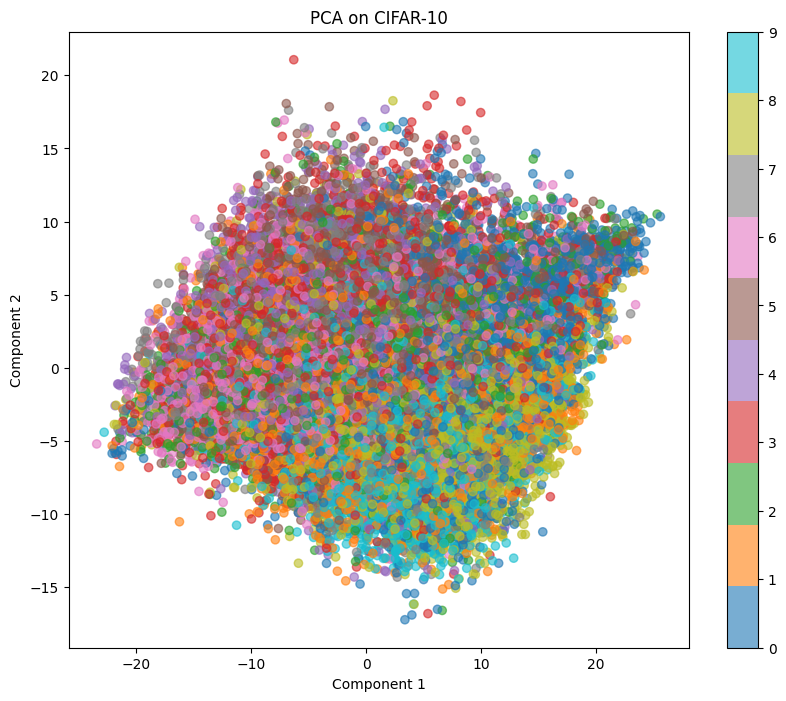

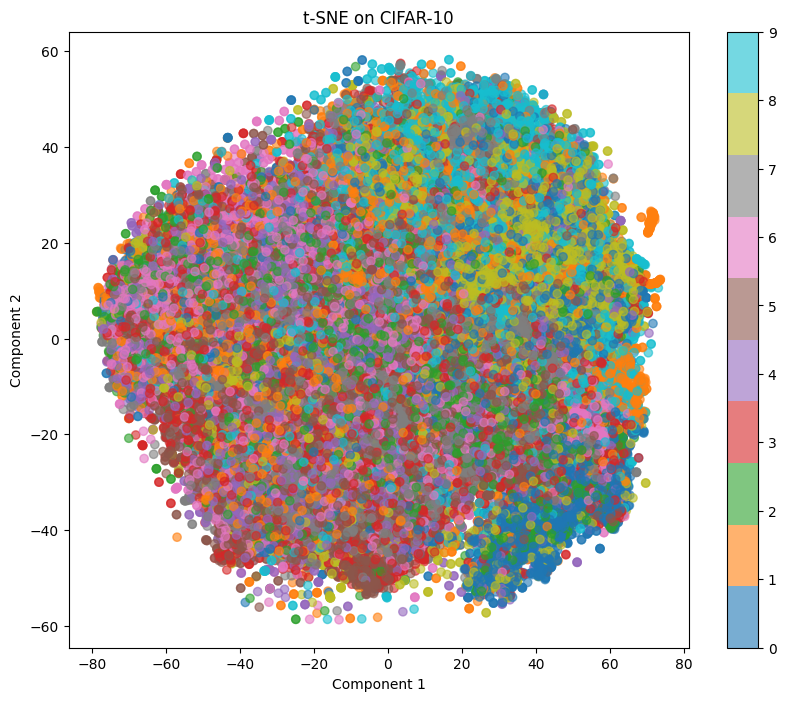

C:\Users\ayush\anaconda3\envs\Ayush\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


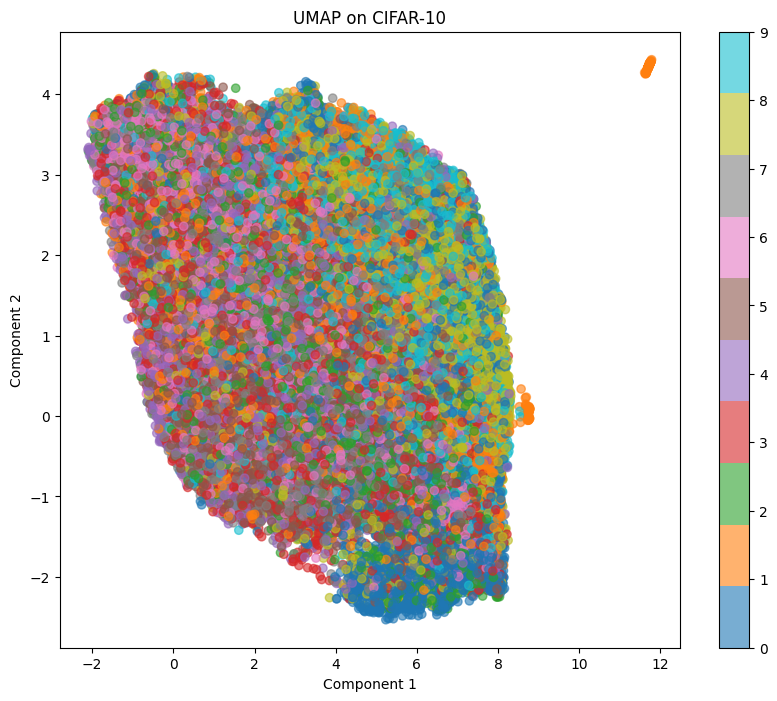

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# Function to unpickle CIFAR-10 dataset
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Path to CIFAR-10 batches
data_dir = r"C:\Users\ayush\OneDrive\Desktop\cifar-10-batches-py"
batch_files = [os.path.join(data_dir, f"data_batch_{i}") for i in range(1, 6)]

# Load CIFAR-10 dataset
X_list = []
y_list = []
for file in batch_files:
    batch = unpickle(file)
    X_list.append(batch[b'data'])
    y_list.extend(batch[b'labels'])

X = np.vstack(X_list)  # Convert to numpy array
y = np.array(y_list)

# Normalize the data (scale pixel values between 0 and 1)
X_normalized = X / 255.0

# Function to plot results
def plot_2d_projection(data_2d, labels, title):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='tab10', alpha=0.6)
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)
plot_2d_projection(X_pca, y, "PCA on CIFAR-10")

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_normalized)
plot_2d_projection(X_tsne, y, "t-SNE on CIFAR-10")

# Apply UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_normalized)
plot_2d_projection(X_umap, y, "UMAP on CIFAR-10")


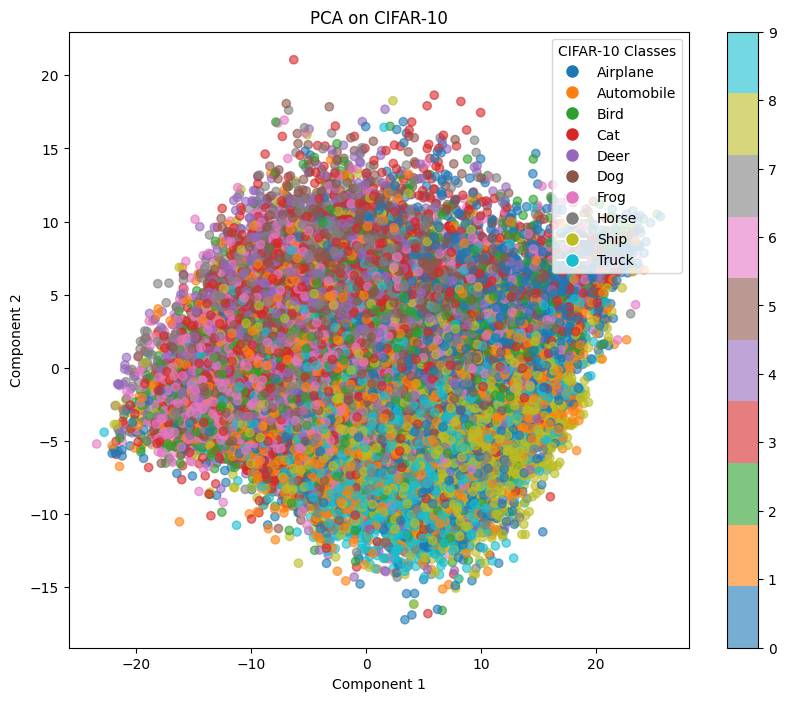

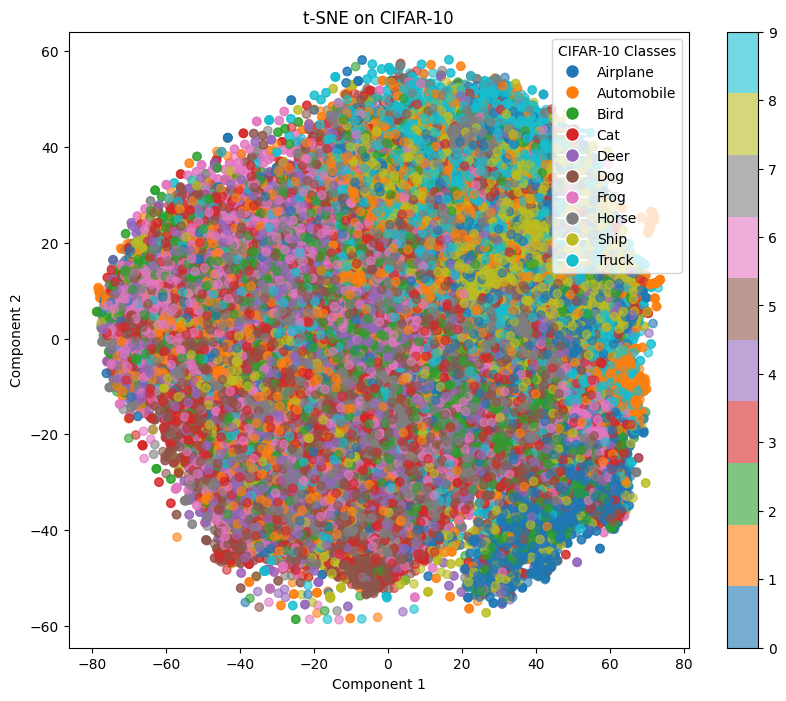

C:\Users\ayush\anaconda3\envs\Ayush\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


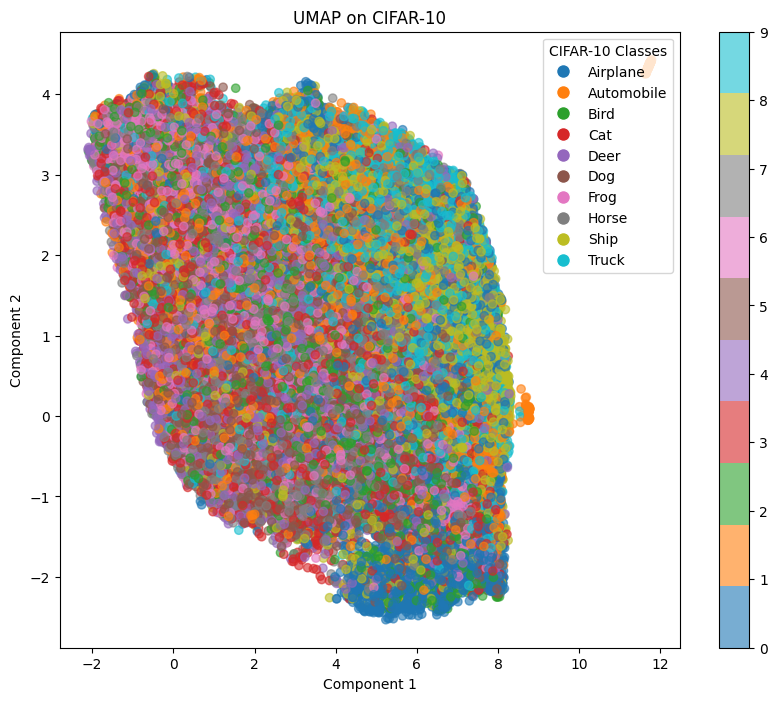

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# CIFAR-10 class names
cifar10_classes = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer", 
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# Function to unpickle CIFAR-10 dataset
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Path to CIFAR-10 batches
data_dir = r"C:\Users\ayush\OneDrive\Desktop\cifar-10-batches-py"
batch_files = [os.path.join(data_dir, f"data_batch_{i}") for i in range(1, 6)]

# Load CIFAR-10 dataset
X_list = []
y_list = []
for file in batch_files:
    batch = unpickle(file)
    X_list.append(batch[b'data'])
    y_list.extend(batch[b'labels'])

X = np.vstack(X_list)  # Convert to numpy array
y = np.array(y_list)

# Normalize the data (scale pixel values between 0 and 1)
X_normalized = X / 255.0

# Function to plot results with legend
def plot_2d_projection(data_2d, labels, title):
    plt.figure(figsize=(10, 8))

    # Generate scatter plot
    scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='tab10', alpha=0.6)

    # Create a legend with CIFAR-10 class names
    handles = [plt.Line2D([0], [0], marker='o', color='w', 
                          markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10) 
               for i in range(10)]
    plt.legend(handles, cifar10_classes, title="CIFAR-10 Classes", loc="upper right")

    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)
plot_2d_projection(X_pca, y, "PCA on CIFAR-10")

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_normalized)
plot_2d_projection(X_tsne, y, "t-SNE on CIFAR-10")

# Apply UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_normalized)
plot_2d_projection(X_umap, y, "UMAP on CIFAR-10")


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os

# Function to unpickle CIFAR-10 dataset
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Path to CIFAR-10 batches
data_dir = r"C:\Users\ayush\OneDrive\Desktop\cifar-10-batches-py"
batch_files = [os.path.join(data_dir, f"data_batch_{i}") for i in range(1, 6)]
test_batch_file = os.path.join(data_dir, "test_batch")

# Load CIFAR-10 training dataset
X_list = []
y_list = []
for file in batch_files:
    batch = unpickle(file)
    X_list.append(batch[b'data'])
    y_list.extend(batch[b'labels'])

X_train = np.vstack(X_list).reshape(-1, 32, 32, 3)  # Reshape to (num_samples, 32, 32, 3)
y_train = np.array(y_list)

# Load CIFAR-10 test dataset
test_batch = unpickle(test_batch_file)
X_test = test_batch[b'data'].reshape(-1, 32, 32, 3)
y_test = np.array(test_batch[b'labels'])

# Normalize pixel values (scale between 0 and 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Define the CNN model
def create_cnn_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Create and train the CNN model
cnn_model = create_cnn_model()
cnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
_, accuracy = cnn_model.evaluate(X_test, y_test)
print(f"\nFinal Accuracy on Original CIFAR-10 Dataset: {accuracy * 100:.2f}%")


Epoch 1/10
782/782 [==============================] - 20s 26ms/step - loss: 1.7253 - accuracy: 0.3713 - val_loss: 1.5050 - val_accuracy: 0.4571
Epoch 2/10
782/782 [==============================] - 22s 28ms/step - loss: 1.4272 - accuracy: 0.4887 - val_loss: 1.3786 - val_accuracy: 0.5109
Epoch 3/10
782/782 [==============================] - 20s 26ms/step - loss: 1.2936 - accuracy: 0.5412 - val_loss: 1.2996 - val_accuracy: 0.5297
Epoch 4/10
782/782 [==============================] - 18s 23ms/step - loss: 1.1927 - accuracy: 0.5781 - val_loss: 1.2246 - val_accuracy: 0.5650
Epoch 5/10
782/782 [==============================] - 19s 24ms/step - loss: 1.1090 - accuracy: 0.6074 - val_loss: 1.2090 - val_accuracy: 0.5769
Epoch 6/10
782/782 [==============================] - 18s 23ms/step - loss: 1.0428 - accuracy: 0.6330 - val_loss: 1.1566 - val_accuracy: 0.5986
Epoch 7/10
782/782 [==============================] - 18s 24ms/step - loss: 0.9877 - accuracy: 0.6532 - val_loss: 1.1868 - val_accuracy:

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.model_selection import train_test_split
import pickle
import cv2

# Function to unpickle CIFAR-10 dataset
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Load CIFAR-10 dataset
batch_path = "C:/Users/ayush/OneDrive/Desktop/cifar-10-batches-py/"
X, y = [], []
for i in range(1, 6):  # Load all training batches
    batch = unpickle(batch_path + f"data_batch_{i}")
    X.append(batch[b'data'])
    y.extend(batch[b'labels'])

X = np.vstack(X).reshape(-1, 32, 32, 3).astype(np.float32) / 255.0
y = np.array(y)

# Function to reduce dimensionality and reshape for CNN
def reduce_and_reshape(X, y, reducer, name, target_size=(32, 32)):
    X_flattened = X.reshape(X.shape[0], -1)  # Flatten 32x32x3 to a 1D vector
    X_reduced = reducer.fit_transform(X_flattened)
    
    # Upscale back to CNN-compatible shape
    X_upscaled = np.array([cv2.resize(img.reshape(1, -1), target_size, interpolation=cv2.INTER_LINEAR) for img in X_reduced])
    X_upscaled = np.expand_dims(X_upscaled, axis=-1)  # Add channel dimension
    
    print(f"{name} reduced shape:", X_upscaled.shape)
    return X_upscaled, y

# Apply Dimensionality Reduction Techniques
reducers = {
    "PCA": PCA(n_components=256),
    "t-SNE": TSNE(n_components=2, random_state=42),
    "UMAP": umap.UMAP(n_components=50, random_state=42)
}

X_reduced_datasets = {}
for name, reducer in reducers.items():
    X_reduced_datasets[name], y_reduced = reduce_and_reshape(X, y, reducer, name)

# Split original dataset for comparison
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CNN Model
def build_cnn(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train CNN on each reduced dataset
for name, X_reduced in X_reduced_datasets.items():
    X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)
    
    print(f"Training CNN on {name}-reduced data")
    model = build_cnn(X_train_red.shape[1:])
    model.fit(X_train_red, y_train_red, epochs=10, validation_data=(X_test_red, y_test_red))
    loss, acc = model.evaluate(X_test_red, y_test_red)
    print(f"{name} Accuracy: {acc * 100:.2f}%\n")

# Train CNN on original dataset
print("Training CNN on Original CIFAR-10 Dataset")
original_model = build_cnn(X_train.shape[1:])
original_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
loss, acc = original_model.evaluate(X_test, y_test)
print(f"Original Dataset Accuracy: {acc * 100:.2f}%")


PCA reduced shape: (50000, 32, 32, 1)
t-SNE reduced shape: (50000, 32, 32, 1)


C:\Users\ayush\anaconda3\envs\Ayush\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP reduced shape: (50000, 32, 32, 1)
Training CNN on PCA-reduced data
Epoch 1/10
1250/1250 [==============================] - 15s 11ms/step - loss: 2.1634 - accuracy: 0.1931 - val_loss: 2.1155 - val_accuracy: 0.2130
Epoch 2/10
1250/1250 [==============================] - 15s 12ms/step - loss: 2.1213 - accuracy: 0.2148 - val_loss: 2.1110 - val_accuracy: 0.2199
Epoch 3/10
1250/1250 [==============================] - 14s 12ms/step - loss: 2.1036 - accuracy: 0.2238 - val_loss: 2.0992 - val_accuracy: 0.2311
Epoch 4/10
1250/1250 [==============================] - 14s 11ms/step - loss: 2.0984 - accuracy: 0.2273 - val_loss: 2.0982 - val_accuracy: 0.2252
Epoch 5/10
1250/1250 [==============================] - 14s 11ms/step - loss: 2.0862 - accuracy: 0.2324 - val_loss: 2.0893 - val_accuracy: 0.2277
Epoch 6/10
1250/1250 [==============================] - 15s 12ms/step - loss: 2.0845 - accuracy: 0.2320 - val_loss: 2.0895 - val_accuracy: 0.2309
Epoch 7/10
1250/1250 [==============================

In [1]:
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Function to unpickle CIFAR-10 dataset
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Path to CIFAR-10 batches
data_dir = r"C:\Users\ayush\OneDrive\Desktop\cifar-10-batches-py"
batch_files = [os.path.join(data_dir, f"data_batch_{i}") for i in range(1, 6)]

# Load CIFAR-10 dataset
X_list, y_list = [], []
for file in batch_files:
    batch = unpickle(file)
    X_list.append(batch[b'data'])
    y_list.extend(batch[b'labels'])

X = np.vstack(X_list).astype(np.float32) / 255.0  # Normalize
y = np.array(y_list)

# Function to reduce dimensions and reshape back for CNN
def reduce_and_reshape(X, y, reducer, name, target_shape):
    print(f"Applying {name}...")
    X_reduced = reducer.fit_transform(X)

    # If shape is too small (like t-SNE's 2D output), use a Dense model instead
    if target_shape[0] < 4 or target_shape[1] < 4:
        return X_reduced, y, "MLP"

    # Reshape for CNN input
    try:
        X_upscaled = np.expand_dims(X_reduced.reshape(-1, target_shape[0], target_shape[1]), axis=-1)
    except ValueError as e:
        print(f"Error reshaping {name} output: {e}")
        return None, None, None
    
    print(f"{name} reduced shape:", X_reduced.shape)
    return X_upscaled, y, "CNN"

# Define dimensionality reduction techniques
reducers = {
    "PCA": (PCA(n_components=256), (16, 16)),  # PCA allows 16x16 reshaping
    "t-SNE": (TSNE(n_components=2, random_state=42), (2, 1)),  # Too small for CNN, use MLP
    "UMAP": (umap.UMAP(n_components=64, random_state=42), (8, 8))  # Bigger shape than before
}

# Dictionary to store results
results = {}

# CNN Model Definition (only for high-dimensional inputs)
def create_cnn_model(input_shape):
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(input_shape[0], input_shape[1], 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# MLP Model (for low-dimensional inputs like t-SNE)
def create_mlp_model(input_shape):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Train on each reduced dataset
for name, (reducer, shape) in reducers.items():
    X_reduced, y_reduced, model_type = reduce_and_reshape(X, y, reducer, name, shape)
    
    if X_reduced is None:
        continue  # Skip if reshaping failed
    
    # Split into train and test sets
    split = int(0.8 * len(X_reduced))
    X_train, X_test = X_reduced[:split], X_reduced[split:]
    y_train, y_test = y_reduced[:split], y_reduced[split:]

    # Choose the correct model type
    if model_type == "CNN":
        model = create_cnn_model(shape)
    else:
        model = create_mlp_model(X_train.shape[1])  # Use Dense model for t-SNE

    # Train model
    model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)

    # Evaluate
    _, accuracy = model.evaluate(X_test, y_test)
    results[name] = accuracy

# Print Accuracy Results
print("\nDimensionality Reduction Accuracy Scores:")
for method, acc in results.items():
    print(f"{method}: {acc * 100:.2f}%")


Applying PCA...
PCA reduced shape: (50000, 256)
Epoch 1/10
625/625 [==============================] - 5s 8ms/step - loss: 1.8337 - accuracy: 0.3428 - val_loss: 1.6596 - val_accuracy: 0.4080
Epoch 2/10
625/625 [==============================] - 5s 9ms/step - loss: 1.5826 - accuracy: 0.4362 - val_loss: 1.5685 - val_accuracy: 0.4444
Epoch 3/10
625/625 [==============================] - 5s 8ms/step - loss: 1.4935 - accuracy: 0.4685 - val_loss: 1.5273 - val_accuracy: 0.4613
Epoch 4/10
625/625 [==============================] - 5s 7ms/step - loss: 1.4233 - accuracy: 0.4936 - val_loss: 1.5064 - val_accuracy: 0.4666
Epoch 5/10
625/625 [==============================] - 5s 8ms/step - loss: 1.3754 - accuracy: 0.5119 - val_loss: 1.5102 - val_accuracy: 0.4633
Epoch 6/10
625/625 [==============================] - 5s 7ms/step - loss: 1.3276 - accuracy: 0.5305 - val_loss: 1.4686 - val_accuracy: 0.4850
Epoch 7/10
625/625 [==============================] - 5s 7ms/step - loss: 1.2904 - accuracy: 0.5411 

C:\Users\ayush\anaconda3\envs\Ayush\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP reduced shape: (50000, 64)
Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 2.1596 - accuracy: 0.1888 - val_loss: 2.0692 - val_accuracy: 0.2423
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 2.0423 - accuracy: 0.2456 - val_loss: 2.0182 - val_accuracy: 0.2597
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 2.0048 - accuracy: 0.2623 - val_loss: 2.0032 - val_accuracy: 0.2646
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 1.9791 - accuracy: 0.2736 - val_loss: 1.9669 - val_accuracy: 0.2849
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 1.9599 - accuracy: 0.2834 - val_loss: 1.9620 - val_accuracy: 0.2882
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 1.9448 - accuracy: 0.2927 - val_loss: 1.9808 - val_accuracy: 0.2867
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 1.9322 - accuracy: 0.2982 - val_loss: 1.93